In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Triangle Schmigalla layout planning heuristic

As said in the readme, Schmigalla triangle heuristic is a very interesting approach  seeking for some feasible layout alternatives susceptible to be deployed in build-up projects about facilities planning, for this example I've used 27 functional components (warehouses, workstations, and so on), that are columns and index DataFrame(), about matrix values, represents flow material between these components, all related information it's already found in one of my [GitHub Repos](https://github.com/jairohndzmos/-Capacities-analysis-for-manufacturing-facilities-planning)

In [2]:
df = pd.read_excel('Análisis de capacidades.xlsx', sheetname='Entrada metodo triangular num', index_col = 0)
df.index.name = None
df = df.fillna(0)

C:\Users\PCMASTER\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2766.005841,0,0.000000
2,99.313685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,412.648156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841697,0.000000,0,0.000000
4,0.000000,0.000000,404.674143,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,833.128398,0.000000,0.000000,9.255375,0.000000,12.470400,0.000000,0,78.818982
5,0.000000,99.239911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4638.555528,0.000000,0.000000,0.000000,0.000000,0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
8,2000.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,1993.518000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3994.218,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
10,0.000000,0.000000,0.000000,1261.191898,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333918,0.000000,0,0.000000


the next two lines, I'll define elements in the manner that df[i,j] position has the same element as their homologate df[j,i] pair

In [4]:
for i in df.columns:
    it = df.index[df[i] != 0].tolist()
    
    for j in it:
        if int(i) < int(j):
            df[j][i] += df[i][j]
            df[i][j] = 0

C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
for i in df.columns:
    it = df.index[df[i] != 0].tolist()
    for j in it:
        df[j][i] = df[i][j]

C:\Users\PCMASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Try out by yourself some quick examination

In [6]:
df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.000000,99.313685,412.648156,0.000000,0.000000,0.000000,0.000000,2000.700,0.000000,0.000000,...,0.000000,0.000000,253.344000,0.000000,0.000000,0.000000,0.000000,2766.005841,0,0.000000
2,99.313685,0.000000,0.000000,0.000000,99.239911,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,412.648156,0.000000,0.000000,404.674143,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841697,0.000000,25,0.000000
4,0.000000,0.000000,404.674143,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1261.191898,...,0.000000,833.128398,0.000000,0.000000,9.255375,0.000000,12.470400,0.000000,712,92.018982
5,0.000000,99.239911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.639911,6.350355,0.000000,0.000000,80,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4638.555528,0.000000,0.000000,0.000000,0.000000,4638,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,324.151614,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
8,2000.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,3994.218000,0.000000,...,0.000000,1993.518000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3994.218,0.000000,0.000000,...,0.000000,0.000000,4404.006774,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
10,0.000000,0.000000,0.000000,1261.191898,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333918,0.000000,997,0.000000


init() function initializes the heuristic, it began choosing the most confluent nodes (functional parts), just call up it passing df as unique argument

```
init(df)
```
it returned two objects, the first one is o that represent the order sequence assigned by the algorithm, and Zo object that shows id_node-value pair that represent confluent flow for each node, moreover, when tie case being set up, it resolved by intensity and quantity relations criteria, explained in more detail taking up a look to the readme

In [7]:
def init(frame):
    
    maximo = 0
    l = list(filter(lambda x: x >= max(frame.max(axis = 0)), frame.max(axis = 0)))
    r = [x for x in frame.max(axis = 0)] 
    to_evaluate = []
    to_choose = []
    order = []
    
    for i in l:
        try:
            if i > maximo:
                maximo = float(i)
        except:
            continue
            
    for i, j in enumerate(r):
        if j == maximo:
            to_evaluate.append(i+1)
            

    for k in to_evaluate:
        to_choose.append([sum(frame.loc[k]), k])
   

    chosen = max(to_choose, key = lambda x: x[0])
    #chosen = min(to_choose, key = lambda x: x[1])
    
    order.append(chosen[1])
    

    selected_row = frame.loc[chosen[1]]
    selected_row=selected_row.astype(object)
    selected_row[chosen[1]] = 'X'
    #selected_row[chosen[1]-1] = 'X'
    
    return order, selected_row

In [8]:
o, Zo = init(df)

In [9]:
Zo

1     2766.01
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13    8710.69
14          0
15          0
16          0
17          0
18    6100.63
19    15377.3
20          0
21          0
22          0
23          0
24          0
25          X
26          0
27          0
Name: 25, dtype: object

Don't mind to hit iteration() function line code to keep going through all algorithm
```
iteration(df, o, Zo)
```
it returned same two objects describes in init() function that are o and Zo

In [10]:
def iteration(frame, order, selected_row):

    maximo = 0
    to_evaluate = []
    to_choose = []
    add_row = []
    
    for i in selected_row:
        try:
            if i > maximo:
                maximo = float(i)
        except:
            continue
            
 
    for j, k in enumerate(selected_row):
        if k == maximo:
            to_evaluate.append(j+1)
            

    for i in to_evaluate:
         to_choose.append([sum(df.loc[i]), i])
            
    chosen = max(to_choose, key = lambda x: x[0])
    
    order.append(chosen[1])
    new_row = frame.loc[chosen[1]]
    new_row = new_row.astype(object)
    new_row[chosen[1]] = 'X'
    #new_row[chosen[1]-1] = 'X'
    

    for i, j in zip(selected_row,  new_row):
        try:
            add_row.append(i+j)
        except:
            add_row.append('X')

    add_row = pd.Series(add_row, index = selected_row.index)


            
    return order, add_row

In [11]:
o, Zo = iteration(df, o, Zo)

In [12]:
Zo

1     2766.01
2           0
3           0
4     833.128
5           0
6           0
7           0
8     1993.52
9           0
10          0
11          0
12          0
13    8710.69
14          0
15          0
16          0
17          0
18    6100.63
19          X
20          0
21          0
22          0
23     23.248
24          0
25          X
26      12527
27          0
dtype: object

In [13]:
o, Zo = iteration(df, o, Zo)

In [14]:
o

[25, 19, 26]

In [15]:
Zo

1     2766.01
2           0
3          25
4     1545.13
5          80
6        4638
7           0
8     1993.52
9           0
10        997
11          0
12          0
13    16785.7
14          0
15          0
16          0
17          0
18    6100.63
19          X
20          0
21          0
22          3
23     23.248
24          0
25          X
26          X
27          0
dtype: object

In [16]:
o, Zo = iteration(df, o, Zo)

In [17]:
o

[25, 19, 26, 13]

In [18]:
Zo

1     2766.01
2           0
3          25
4     2180.12
5          80
6        4638
7           0
8     1993.52
9           0
10        997
11          0
12          0
13          X
14          0
15          0
16          0
17          0
18    6100.63
19          X
20          0
21          0
22          3
23     23.248
24          0
25          X
26          X
27          0
dtype: object

In [19]:
o, Zo = iteration(df, o, Zo)

In [20]:
Zo

1     2766.01
2           0
3          25
4     2180.12
5          80
6        4638
7           0
8     1993.52
9           0
10        997
11          0
12          0
13          X
14    225.018
15          0
16          0
17    5875.62
18          X
19          X
20          0
21          0
22          3
23     23.248
24          0
25          X
26          X
27          0
dtype: object

In [21]:
o, Zo = iteration(df, o, Zo)

In [22]:
o

[25, 19, 26, 13, 18, 17]

In [23]:
o, Zo = iteration(df, o, Zo)

In [24]:
o

[25, 19, 26, 13, 18, 17, 16]

In [25]:
o

[25, 19, 26, 13, 18, 17, 16]

In [48]:
o

[25,
 19,
 26,
 13,
 18,
 17,
 16,
 15,
 14,
 6,
 21,
 20,
 9,
 8,
 1,
 4,
 10,
 3,
 7,
 12,
 11,
 2,
 5,
 27,
 23,
 22,
 24]

### NetowrkX diagram construction
Below is just some straight-forward approaching due needed to select manually all possibles final layouts

In [50]:
def func_initial(secuence):
    G = nx.Graph()
    G.add_node(o[0])
    #G.add_edge(o[0], o[1])
    e = (o[2], o[0])
    G.add_edge(*e)  # unpack edge tuple*
    G.add_edges_from([(o[1], o[2]), (o[1], o[0])])
    return G
   

C:\Users\PCMASTER\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


NodeView((25, 26, 19))

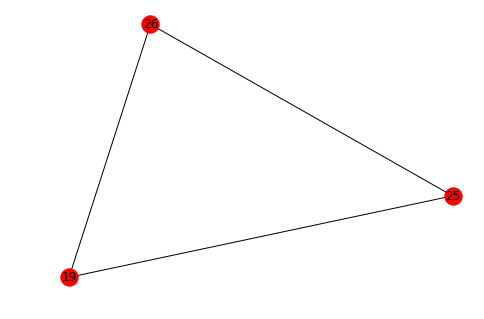

In [51]:
G = func_initial(o)
nx.draw(G, with_labels=True)
G.nodes

In [52]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 16785.689
(25, 26) 13
Sum 8710.688999999998
(25, 19) 13
Sum 8075.0
(26, 19) 13


In [53]:
G.add_node(o[len(G.nodes)])

In [54]:
G.nodes
e = (o[3], o[0])
d = (o[3], o[2])
G.add_edge(*e)
G.add_edge(*d)

In [55]:
G.edges

EdgeView([(25, 26), (25, 19), (25, 13), (26, 19), (26, 13)])

NodeView((25, 26, 19, 13))

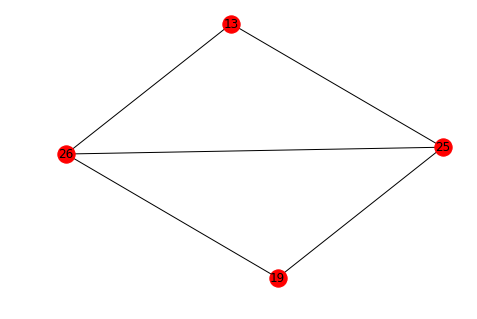

In [56]:
nx.draw(G, with_labels=True)
G.nodes

In [57]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 6100.63421499
(25, 26) 18
Sum 6100.63421499
(25, 19) 18
Sum 6100.63421499
(25, 13) 18
Sum 0.0
(26, 19) 18
Sum 0.0
(26, 13) 18


In [58]:
G.add_node(o[len(G.nodes)])
H = G
G.nodes

NodeView((25, 26, 19, 13, 18))

In [59]:
#Changing from this point
#
#
e = (o[4], o[0])
d = (o[4], o[3])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18))

In [676]:
#e = (o[4], o[0])
#d = (o[4], o[1])
#H.add_edge(*e)
#H.add_edge(*d)
#H.nodes

NodeView((25, 26, 19, 13, 18))

NodeView((25, 26, 19, 13, 18))

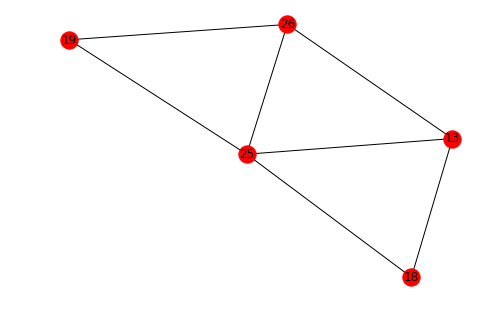

In [63]:
nx.draw(G, with_labels=True)
G.nodes

In [64]:
#SOLO GRAFO G
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 17
Sum 0.0
(25, 19) 17
Sum 0.0
(25, 13) 17
Sum 5875.61621499
(25, 18) 17
Sum 0.0
(26, 19) 17
Sum 0.0
(26, 13) 17
Sum 5875.61621499
(13, 18) 17


In [65]:
G.add_node(o[len(G.nodes)])
G.nodes

NodeView((25, 26, 19, 13, 18, 17))

In [66]:
e = (o[5], o[3])
d = (o[5], o[4])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17))

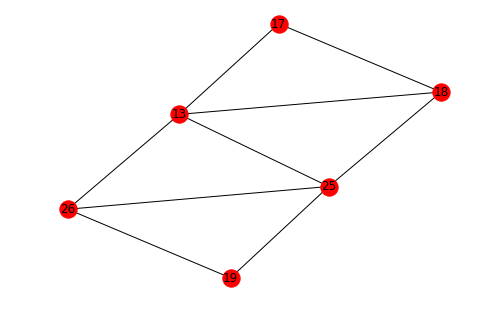

In [67]:
nx.draw(H, with_labels=True)

In [68]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 16
Sum 0.0
(25, 19) 16
Sum 0.0
(25, 13) 16
Sum 0.0
(25, 18) 16
Sum 0.0
(26, 19) 16
Sum 0.0
(26, 13) 16
Sum 0.0
(13, 18) 16
Sum 5789.47109499
(13, 17) 16
Sum 5789.47109499
(18, 17) 16


In [69]:
G.add_node(o[len(G.nodes)])

In [70]:
e = (o[6], o[4])
d = (o[6], o[5])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16))

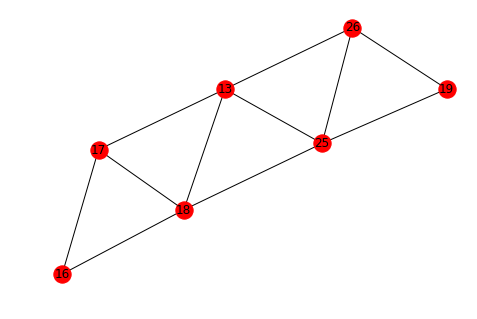

In [71]:
nx.draw(H, with_labels=True)

In [72]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 15
Sum 0.0
(25, 19) 15
Sum 0.0
(25, 13) 15
Sum 0.0
(25, 18) 15
Sum 0.0
(26, 19) 15
Sum 0.0
(26, 13) 15
Sum 0.0
(13, 18) 15
Sum 0.0
(13, 17) 15
Sum 0.0
(18, 17) 15
Sum 5790.0501
(18, 16) 15
Sum 5790.0501
(17, 16) 15


In [73]:
G.add_node(o[len(G.nodes)])

In [74]:
e = (o[7], o[5])
d = (o[7], o[6])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15))

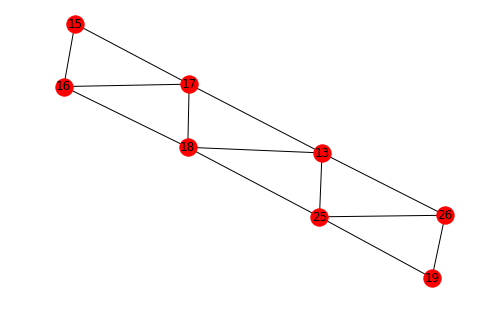

In [76]:
nx.draw(G, with_labels=True)

In [77]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 14
Sum 0.0
(25, 19) 14
Sum 0.0
(25, 13) 14
Sum 225.018
(25, 18) 14
Sum 0.0
(26, 19) 14
Sum 0.0
(26, 13) 14
Sum 225.018
(13, 18) 14
Sum 86.14512
(13, 17) 14
Sum 311.16312
(18, 17) 14
Sum 225.018
(18, 16) 14
Sum 86.14512
(17, 16) 14
Sum 5991.996222000001
(17, 15) 14
Sum 5905.8511020000005
(16, 15) 14


In [78]:
G.add_node(o[len(G.nodes)])

In [79]:
e = (o[8], o[6])
d = (o[8], o[7])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14))

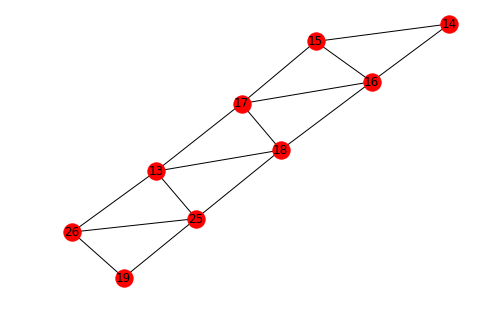

In [80]:
nx.draw(G, with_labels=True)

In [81]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 4638.0
(25, 26) 6
Sum 0.0
(25, 19) 6
Sum 0.0
(25, 13) 6
Sum 0.0
(25, 18) 6
Sum 4638.0
(26, 19) 6
Sum 4638.0
(26, 13) 6
Sum 0.0
(13, 18) 6
Sum 0.0
(13, 17) 6
Sum 0.0
(18, 17) 6
Sum 0.0
(18, 16) 6
Sum 0.0
(17, 16) 6
Sum 0.0
(17, 15) 6
Sum 0.0
(16, 15) 6
Sum 0.0
(16, 14) 6
Sum 0.0
(15, 14) 6


In [82]:
G.add_node(o[len(G.nodes)])

In [83]:
e = (o[9], o[2])
d = (o[9], o[1])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6))

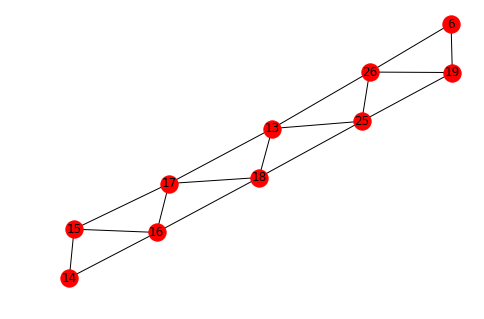

In [85]:
nx.draw(G, with_labels=True)

In [86]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 21
Sum 0.0
(25, 19) 21
Sum 0.0
(25, 13) 21
Sum 0.0
(25, 18) 21
Sum 0.0
(26, 19) 21
Sum 0.0
(26, 13) 21
Sum 4638.55552769874
(26, 6) 21
Sum 4638.55552769874
(19, 6) 21
Sum 0.0
(13, 18) 21
Sum 0.0
(13, 17) 21
Sum 0.0
(18, 17) 21
Sum 0.0
(18, 16) 21
Sum 0.0
(17, 16) 21
Sum 0.0
(17, 15) 21
Sum 0.0
(16, 15) 21
Sum 0.0
(16, 14) 21
Sum 0.0
(15, 14) 21


In [87]:
G.add_node(o[len(G.nodes)])

In [88]:
e = (o[10], o[1])
d = (o[10], o[9])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21))

In [89]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 20
Sum 0.0
(25, 19) 20
Sum 0.0
(25, 13) 20
Sum 0.0
(25, 18) 20
Sum 0.0
(26, 19) 20
Sum 0.0
(26, 13) 20
Sum 0.0
(26, 6) 20
Sum 0.0
(19, 6) 20
Sum 4981.50238780774
(19, 21) 20
Sum 0.0
(13, 18) 20
Sum 0.0
(13, 17) 20
Sum 0.0
(18, 17) 20
Sum 0.0
(18, 16) 20
Sum 0.0
(17, 16) 20
Sum 0.0
(17, 15) 20
Sum 0.0
(16, 15) 20
Sum 0.0
(16, 14) 20
Sum 0.0
(15, 14) 20
Sum 4981.50238780774
(6, 21) 20


In [90]:
G.add_node(o[len(G.nodes)])
e = (o[11], o[9])
d = (o[11], o[10])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20))

In [91]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 9
Sum 0.0
(25, 19) 9
Sum 0.0
(25, 13) 9
Sum 0.0
(25, 18) 9
Sum 0.0
(26, 19) 9
Sum 0.0
(26, 13) 9
Sum 0.0
(26, 6) 9
Sum 0.0
(19, 6) 9
Sum 0.0
(19, 21) 9
Sum 0.0
(13, 18) 9
Sum 0.0
(13, 17) 9
Sum 0.0
(18, 17) 9
Sum 0.0
(18, 16) 9
Sum 0.0
(17, 16) 9
Sum 0.0
(17, 15) 9
Sum 0.0
(16, 15) 9
Sum 0.0
(16, 14) 9
Sum 0.0
(15, 14) 9
Sum 0.0
(6, 21) 9
Sum 4404.006773941417
(6, 20) 9
Sum 4404.006773941417
(21, 20) 9


In [92]:
G.add_node(o[len(G.nodes)])
e = (o[12], o[11])
d = (o[12], o[10])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9))

In [93]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 8
Sum 1993.5179999999998
(25, 19) 8
Sum 0.0
(25, 13) 8
Sum 0.0
(25, 18) 8
Sum 1993.5179999999998
(26, 19) 8
Sum 0.0
(26, 13) 8
Sum 0.0
(26, 6) 8
Sum 1993.5179999999998
(19, 6) 8
Sum 1993.5179999999998
(19, 21) 8
Sum 0.0
(13, 18) 8
Sum 0.0
(13, 17) 8
Sum 0.0
(18, 17) 8
Sum 0.0
(18, 16) 8
Sum 0.0
(17, 16) 8
Sum 0.0
(17, 15) 8
Sum 0.0
(16, 15) 8
Sum 0.0
(16, 14) 8
Sum 0.0
(15, 14) 8
Sum 0.0
(6, 21) 8
Sum 0.0
(6, 20) 8
Sum 0.0
(21, 20) 8
Sum 3994.218
(21, 9) 8
Sum 3994.218
(20, 9) 8


In [94]:
G.add_node(o[len(G.nodes)])
e = (o[13], o[11])
d = (o[13], o[12])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8))

In [95]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 2766.0058408396603
(25, 26) 1
Sum 2766.0058408396603
(25, 19) 1
Sum 2766.0058408396603
(25, 13) 1
Sum 2766.0058408396603
(25, 18) 1
Sum 0.0
(26, 19) 1
Sum 0.0
(26, 13) 1
Sum 0.0
(26, 6) 1
Sum 0.0
(19, 6) 1
Sum 0.0
(19, 21) 1
Sum 0.0
(13, 18) 1
Sum 0.0
(13, 17) 1
Sum 0.0
(18, 17) 1
Sum 0.0
(18, 16) 1
Sum 0.0
(17, 16) 1
Sum 0.0
(17, 15) 1
Sum 0.0
(16, 15) 1
Sum 0.0
(16, 14) 1
Sum 0.0
(15, 14) 1
Sum 0.0
(6, 21) 1
Sum 253.344
(6, 20) 1
Sum 253.344
(21, 20) 1
Sum 0.0
(21, 9) 1
Sum 253.344
(20, 9) 1
Sum 2254.044
(20, 8) 1
Sum 2000.7
(9, 8) 1


In [96]:
G.add_node(o[len(G.nodes)])
e = (o[14], o[0])
d = (o[14], o[1])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1))

In [97]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 712.0
(25, 26) 4
Sum 833.128397815954
(25, 19) 4
Sum 634.9883085
(25, 13) 4
Sum 0.0
(25, 18) 4
Sum 0.0
(25, 1) 4
Sum 1545.128397815954
(26, 19) 4
Sum 1346.9883085000001
(26, 13) 4
Sum 712.0
(26, 6) 4
Sum 833.128397815954
(19, 6) 4
Sum 833.128397815954
(19, 21) 4
Sum 833.128397815954
(19, 1) 4
Sum 634.9883085
(13, 18) 4
Sum 634.9883085
(13, 17) 4
Sum 0.0
(18, 17) 4
Sum 0.0
(18, 16) 4
Sum 0.0
(17, 16) 4
Sum 0.0
(17, 15) 4
Sum 0.0
(16, 15) 4
Sum 0.0
(16, 14) 4
Sum 0.0
(15, 14) 4
Sum 0.0
(6, 21) 4
Sum 0.0
(6, 20) 4
Sum 0.0
(21, 20) 4
Sum 0.0
(21, 9) 4
Sum 0.0
(20, 9) 4
Sum 0.0
(20, 8) 4
Sum 0.0
(9, 8) 4


In [98]:
G.add_node(o[len(G.nodes)])
e = (o[15], o[3])
d = (o[15], o[2])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4))

In [99]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 997.0
(25, 26) 10
Sum 0.0
(25, 19) 10
Sum 0.0
(25, 13) 10
Sum 0.0
(25, 18) 10
Sum 0.0
(25, 1) 10
Sum 997.0
(26, 19) 10
Sum 997.0
(26, 13) 10
Sum 997.0
(26, 6) 10
Sum 2258.191897958896
(26, 4) 10
Sum 0.0
(19, 6) 10
Sum 0.0
(19, 21) 10
Sum 0.0
(19, 1) 10
Sum 0.0
(13, 18) 10
Sum 0.0
(13, 17) 10
Sum 1261.1918979588959
(13, 4) 10
Sum 0.0
(18, 17) 10
Sum 0.0
(18, 16) 10
Sum 0.0
(17, 16) 10
Sum 0.0
(17, 15) 10
Sum 0.0
(16, 15) 10
Sum 0.0
(16, 14) 10
Sum 0.0
(15, 14) 10
Sum 0.0
(6, 21) 10
Sum 0.0
(6, 20) 10
Sum 0.0
(21, 20) 10
Sum 0.0
(21, 9) 10
Sum 0.0
(20, 9) 10
Sum 0.0
(20, 8) 10
Sum 0.0
(9, 8) 10


In [100]:
G.add_node(o[len(G.nodes)])
e = (o[16], o[15])
d = (o[16], o[2])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10))

In [101]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 25.0
(25, 26) 3
Sum 0.0
(25, 19) 3
Sum 0.0
(25, 13) 3
Sum 0.0
(25, 18) 3
Sum 412.64815595501244
(25, 1) 3
Sum 25.0
(26, 19) 3
Sum 25.0
(26, 13) 3
Sum 25.0
(26, 6) 3
Sum 429.6741430972801
(26, 4) 3
Sum 25.0
(26, 10) 3
Sum 0.0
(19, 6) 3
Sum 0.0
(19, 21) 3
Sum 412.64815595501244
(19, 1) 3
Sum 0.0
(13, 18) 3
Sum 0.0
(13, 17) 3
Sum 404.6741430972801
(13, 4) 3
Sum 0.0
(18, 17) 3
Sum 0.0
(18, 16) 3
Sum 0.0
(17, 16) 3
Sum 0.0
(17, 15) 3
Sum 0.0
(16, 15) 3
Sum 0.0
(16, 14) 3
Sum 0.0
(15, 14) 3
Sum 0.0
(6, 21) 3
Sum 0.0
(6, 20) 3
Sum 0.0
(21, 20) 3
Sum 0.0
(21, 9) 3
Sum 0.0
(20, 9) 3
Sum 0.0
(20, 8) 3
Sum 0.0
(9, 8) 3
Sum 404.6741430972801
(4, 10) 3


In [102]:
G.add_node(o[len(G.nodes)])
e = (o[17], o[1])
d = (o[17], o[14])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3))

In [103]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 7
Sum 0.0
(25, 19) 7
Sum 0.0
(25, 13) 7
Sum 0.0
(25, 18) 7
Sum 0.0
(25, 1) 7
Sum 0.0
(26, 19) 7
Sum 0.0
(26, 13) 7
Sum 0.0
(26, 6) 7
Sum 0.0
(26, 4) 7
Sum 0.0
(26, 10) 7
Sum 0.0
(19, 6) 7
Sum 0.0
(19, 21) 7
Sum 0.0
(19, 1) 7
Sum 0.0
(19, 3) 7
Sum 0.0
(13, 18) 7
Sum 0.0
(13, 17) 7
Sum 0.0
(13, 4) 7
Sum 0.0
(18, 17) 7
Sum 0.0
(18, 16) 7
Sum 0.0
(17, 16) 7
Sum 0.0
(17, 15) 7
Sum 0.0
(16, 15) 7
Sum 0.0
(16, 14) 7
Sum 0.0
(15, 14) 7
Sum 0.0
(6, 21) 7
Sum 324.1516138663223
(6, 20) 7
Sum 324.1516138663223
(21, 20) 7
Sum 0.0
(21, 9) 7
Sum 324.1516138663223
(20, 9) 7
Sum 324.1516138663223
(20, 8) 7
Sum 0.0
(9, 8) 7
Sum 0.0
(1, 3) 7
Sum 0.0
(4, 10) 7


In [104]:
G.add_node(o[len(G.nodes)])
e = (o[18], o[13])
d = (o[18], o[11])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7))

In [105]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 12
Sum 0.0
(25, 19) 12
Sum 0.0
(25, 13) 12
Sum 0.0
(25, 18) 12
Sum 0.0
(25, 1) 12
Sum 0.0
(26, 19) 12
Sum 0.0
(26, 13) 12
Sum 0.0
(26, 6) 12
Sum 0.0
(26, 4) 12
Sum 0.0
(26, 10) 12
Sum 0.0
(19, 6) 12
Sum 0.0
(19, 21) 12
Sum 0.0
(19, 1) 12
Sum 0.0
(19, 3) 12
Sum 0.0
(13, 18) 12
Sum 0.0
(13, 17) 12
Sum 0.0
(13, 4) 12
Sum 0.0
(18, 17) 12
Sum 0.0
(18, 16) 12
Sum 0.0
(17, 16) 12
Sum 0.0
(17, 15) 12
Sum 0.0
(16, 15) 12
Sum 0.0
(16, 14) 12
Sum 0.0
(15, 14) 12
Sum 0.0
(6, 21) 12
Sum 0.0
(6, 20) 12
Sum 0.0
(21, 20) 12
Sum 320.63094624999997
(21, 9) 12
Sum 320.63094624999997
(20, 9) 12
Sum 0.0
(20, 8) 12
Sum 0.0
(20, 7) 12
Sum 320.63094624999997
(9, 8) 12
Sum 0.0
(8, 7) 12
Sum 0.0
(1, 3) 12
Sum 0.0
(4, 10) 12


In [106]:
G.add_node(o[len(G.nodes)])
e = (o[19], o[13])
d = (o[19], o[12])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12))

In [107]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 11
Sum 0.0
(25, 19) 11
Sum 0.0
(25, 13) 11
Sum 0.0
(25, 18) 11
Sum 0.0
(25, 1) 11
Sum 0.0
(26, 19) 11
Sum 0.0
(26, 13) 11
Sum 0.0
(26, 6) 11
Sum 0.0
(26, 4) 11
Sum 263.38984466839196
(26, 10) 11
Sum 0.0
(19, 6) 11
Sum 0.0
(19, 21) 11
Sum 0.0
(19, 1) 11
Sum 0.0
(19, 3) 11
Sum 0.0
(13, 18) 11
Sum 0.0
(13, 17) 11
Sum 0.0
(13, 4) 11
Sum 0.0
(18, 17) 11
Sum 0.0
(18, 16) 11
Sum 0.0
(17, 16) 11
Sum 0.0
(17, 15) 11
Sum 0.0
(16, 15) 11
Sum 0.0
(16, 14) 11
Sum 0.0
(15, 14) 11
Sum 0.0
(6, 21) 11
Sum 0.0
(6, 20) 11
Sum 0.0
(21, 20) 11
Sum 57.24110158160801
(21, 9) 11
Sum 57.24110158160801
(20, 9) 11
Sum 0.0
(20, 8) 11
Sum 0.0
(20, 7) 11
Sum 57.24110158160801
(9, 8) 11
Sum 377.872047831608
(9, 12) 11
Sum 0.0
(8, 7) 11
Sum 320.63094624999997
(8, 12) 11
Sum 0.0
(1, 3) 11
Sum 263.38984466839196
(4, 10) 11


In [108]:
G.add_node(o[len(G.nodes)])
e = (o[20], o[12])
d = (o[20], o[19])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11))

In [109]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 2
Sum 0.0
(25, 19) 2
Sum 0.0
(25, 13) 2
Sum 0.0
(25, 18) 2
Sum 99.31368488464801
(25, 1) 2
Sum 0.0
(26, 19) 2
Sum 0.0
(26, 13) 2
Sum 0.0
(26, 6) 2
Sum 0.0
(26, 4) 2
Sum 0.0
(26, 10) 2
Sum 0.0
(19, 6) 2
Sum 0.0
(19, 21) 2
Sum 99.31368488464801
(19, 1) 2
Sum 0.0
(19, 3) 2
Sum 0.0
(13, 18) 2
Sum 0.0
(13, 17) 2
Sum 0.0
(13, 4) 2
Sum 0.0
(18, 17) 2
Sum 0.0
(18, 16) 2
Sum 0.0
(17, 16) 2
Sum 0.0
(17, 15) 2
Sum 0.0
(16, 15) 2
Sum 0.0
(16, 14) 2
Sum 0.0
(15, 14) 2
Sum 0.0
(6, 21) 2
Sum 0.0
(6, 20) 2
Sum 0.0
(21, 20) 2
Sum 0.0
(21, 9) 2
Sum 0.0
(20, 9) 2
Sum 0.0
(20, 8) 2
Sum 0.0
(20, 7) 2
Sum 0.0
(9, 8) 2
Sum 0.0
(9, 12) 2
Sum 0.0
(9, 11) 2
Sum 0.0
(8, 7) 2
Sum 0.0
(8, 12) 2
Sum 99.31368488464801
(1, 3) 2
Sum 0.0
(4, 10) 2
Sum 0.0
(12, 11) 2


In [110]:
G.add_node(o[len(G.nodes)])
e = (o[21], o[14])
d = (o[21], o[17])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2))

In [111]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 80.0
(25, 26) 5
Sum 0.0
(25, 19) 5
Sum 0.0
(25, 13) 5
Sum 0.0
(25, 18) 5
Sum 0.0
(25, 1) 5
Sum 80.0
(26, 19) 5
Sum 80.0
(26, 13) 5
Sum 80.0
(26, 6) 5
Sum 80.0
(26, 4) 5
Sum 80.0
(26, 10) 5
Sum 0.0
(19, 6) 5
Sum 0.0
(19, 21) 5
Sum 0.0
(19, 1) 5
Sum 0.0
(19, 3) 5
Sum 0.0
(13, 18) 5
Sum 0.0
(13, 17) 5
Sum 0.0
(13, 4) 5
Sum 0.0
(18, 17) 5
Sum 0.0
(18, 16) 5
Sum 0.0
(17, 16) 5
Sum 0.0
(17, 15) 5
Sum 0.0
(16, 15) 5
Sum 0.0
(16, 14) 5
Sum 0.0
(15, 14) 5
Sum 0.0
(6, 21) 5
Sum 0.0
(6, 20) 5
Sum 0.0
(21, 20) 5
Sum 0.0
(21, 9) 5
Sum 0.0
(20, 9) 5
Sum 0.0
(20, 8) 5
Sum 0.0
(20, 7) 5
Sum 0.0
(9, 8) 5
Sum 0.0
(9, 12) 5
Sum 0.0
(9, 11) 5
Sum 0.0
(8, 7) 5
Sum 0.0
(8, 12) 5
Sum 0.0
(1, 3) 5
Sum 99.23991084000001
(1, 2) 5
Sum 0.0
(4, 10) 5
Sum 99.23991084000001
(3, 2) 5
Sum 0.0
(12, 11) 5


In [112]:
G.add_node(o[len(G.nodes)])
e = (o[22], o[14])
d = (o[22], o[21])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2, 5))

In [113]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 27
Sum 0.0
(25, 19) 27
Sum 0.0
(25, 13) 27
Sum 0.0
(25, 18) 27
Sum 0.0
(25, 1) 27
Sum 0.0
(26, 19) 27
Sum 0.0
(26, 13) 27
Sum 0.0
(26, 6) 27
Sum 92.01898204566174
(26, 4) 27
Sum 0.0
(26, 10) 27
Sum 0.0
(19, 6) 27
Sum 0.0
(19, 21) 27
Sum 0.0
(19, 1) 27
Sum 0.0
(19, 3) 27
Sum 0.0
(13, 18) 27
Sum 0.0
(13, 17) 27
Sum 92.01898204566174
(13, 4) 27
Sum 0.0
(18, 17) 27
Sum 0.0
(18, 16) 27
Sum 0.0
(17, 16) 27
Sum 0.0
(17, 15) 27
Sum 0.0
(16, 15) 27
Sum 0.0
(16, 14) 27
Sum 0.0
(15, 14) 27
Sum 0.0
(6, 21) 27
Sum 0.0
(6, 20) 27
Sum 0.0
(21, 20) 27
Sum 0.0
(21, 9) 27
Sum 0.0
(20, 9) 27
Sum 0.0
(20, 8) 27
Sum 0.0
(20, 7) 27
Sum 0.0
(9, 8) 27
Sum 0.0567
(9, 12) 27
Sum 0.0
(9, 11) 27
Sum 0.0
(8, 7) 27
Sum 0.0567
(8, 12) 27
Sum 0.0
(1, 3) 27
Sum 0.0
(1, 2) 27
Sum 0.0
(1, 5) 27
Sum 92.01898204566174
(4, 10) 27
Sum 0.0
(3, 2) 27
Sum 0.0567
(12, 11) 27
Sum 0.0
(2, 5) 27


In [114]:
G.add_node(o[len(G.nodes)])
e = (o[23], o[15])
d = (o[23], o[16])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2, 5, 27))

In [115]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 23
Sum 23.248
(25, 19) 23
Sum 0.0
(25, 13) 23
Sum 0.0
(25, 18) 23
Sum 0.0
(25, 1) 23
Sum 23.248
(26, 19) 23
Sum 0.0
(26, 13) 23
Sum 0.0
(26, 6) 23
Sum 0.0
(26, 4) 23
Sum 0.0
(26, 10) 23
Sum 23.248
(19, 6) 23
Sum 23.248
(19, 21) 23
Sum 23.248
(19, 1) 23
Sum 23.248
(19, 3) 23
Sum 0.0
(13, 18) 23
Sum 0.0
(13, 17) 23
Sum 0.0
(13, 4) 23
Sum 0.0
(18, 17) 23
Sum 0.0
(18, 16) 23
Sum 0.0
(17, 16) 23
Sum 0.0
(17, 15) 23
Sum 0.0
(16, 15) 23
Sum 0.0
(16, 14) 23
Sum 0.0
(15, 14) 23
Sum 0.0
(6, 21) 23
Sum 0.0
(6, 20) 23
Sum 0.0
(21, 20) 23
Sum 0.0
(21, 9) 23
Sum 0.0
(20, 9) 23
Sum 0.0
(20, 8) 23
Sum 0.0
(20, 7) 23
Sum 0.0
(9, 8) 23
Sum 0.0
(9, 12) 23
Sum 0.0
(9, 11) 23
Sum 0.0
(8, 7) 23
Sum 0.0
(8, 12) 23
Sum 0.0
(1, 3) 23
Sum 0.0
(1, 2) 23
Sum 6.3503549999999995
(1, 5) 23
Sum 0.0
(4, 10) 23
Sum 29.598355
(4, 27) 23
Sum 29.598355
(10, 27) 23
Sum 0.0
(3, 2) 23
Sum 0.0
(12, 11) 23
Sum 6.3503549999999995
(2, 5) 23


In [116]:
G.add_node(o[len(G.nodes)])
e = (o[24], o[16])
d = (o[24], o[23])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2, 5, 27, 23))

In [117]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 3.0
(25, 26) 22
Sum 0.0
(25, 19) 22
Sum 0.0
(25, 13) 22
Sum 0.0
(25, 18) 22
Sum 0.0
(25, 1) 22
Sum 3.0
(26, 19) 22
Sum 3.0
(26, 13) 22
Sum 3.0
(26, 6) 22
Sum 12.255374999999999
(26, 4) 22
Sum 3.0
(26, 10) 22
Sum 0.0
(19, 6) 22
Sum 0.0
(19, 21) 22
Sum 0.0
(19, 1) 22
Sum 0.0
(19, 3) 22
Sum 0.0
(13, 18) 22
Sum 0.0
(13, 17) 22
Sum 9.255374999999999
(13, 4) 22
Sum 0.0
(18, 17) 22
Sum 0.0
(18, 16) 22
Sum 0.0
(17, 16) 22
Sum 0.0
(17, 15) 22
Sum 0.0
(16, 15) 22
Sum 0.0
(16, 14) 22
Sum 0.0
(15, 14) 22
Sum 0.0
(6, 21) 22
Sum 0.0
(6, 20) 22
Sum 0.0
(21, 20) 22
Sum 0.0
(21, 9) 22
Sum 0.0
(20, 9) 22
Sum 0.0
(20, 8) 22
Sum 0.0
(20, 7) 22
Sum 0.0
(9, 8) 22
Sum 0.0
(9, 12) 22
Sum 0.0
(9, 11) 22
Sum 0.0
(8, 7) 22
Sum 0.0
(8, 12) 22
Sum 0.0
(1, 3) 22
Sum 0.0
(1, 2) 22
Sum 12.639910839999999
(1, 5) 22
Sum 9.255374999999999
(4, 10) 22
Sum 9.255374999999999
(4, 27) 22
Sum 0.0
(10, 27) 22
Sum 0.0
(10, 23) 22
Sum 0.0
(3, 2) 22
Sum 0.0
(12, 11) 22
Sum 12.639910839999999
(2, 5) 22
Sum 0.0
(27, 23) 22


In [118]:
G.add_node(o[len(G.nodes)])
e = (o[25], o[21])
d = (o[25], o[22])
G.add_edge(*e)
G.add_edge(*d)
G.nodes

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2, 5, 27, 23, 22))

In [119]:
for j in G.edges:
    print('Sum {}'.format(df[(j[0])][o[len(G.nodes)]]+df[(j[1])][o[len(G.nodes)]]))
    print(j, o[len(G.nodes)])

Sum 0.0
(25, 26) 24
Sum 0.0
(25, 19) 24
Sum 0.0
(25, 13) 24
Sum 0.0
(25, 18) 24
Sum 0.0
(25, 1) 24
Sum 0.0
(26, 19) 24
Sum 0.0
(26, 13) 24
Sum 0.0
(26, 6) 24
Sum 12.470400000000003
(26, 4) 24
Sum 0.33391831679016
(26, 10) 24
Sum 0.0
(19, 6) 24
Sum 0.0
(19, 21) 24
Sum 0.0
(19, 1) 24
Sum 0.8416969161585601
(19, 3) 24
Sum 0.0
(13, 18) 24
Sum 0.0
(13, 17) 24
Sum 12.470400000000003
(13, 4) 24
Sum 0.0
(18, 17) 24
Sum 0.5790050100004009
(18, 16) 24
Sum 0.5790050100004009
(17, 16) 24
Sum 0.0
(17, 15) 24
Sum 0.5790050100004009
(16, 15) 24
Sum 0.5790050100004009
(16, 14) 24
Sum 0.0
(15, 14) 24
Sum 0.0
(6, 21) 24
Sum 0.0
(6, 20) 24
Sum 0.0
(21, 20) 24
Sum 0.0
(21, 9) 24
Sum 0.0
(20, 9) 24
Sum 0.0
(20, 8) 24
Sum 0.0
(20, 7) 24
Sum 0.0
(9, 8) 24
Sum 0.0
(9, 12) 24
Sum 0.0
(9, 11) 24
Sum 0.0
(8, 7) 24
Sum 0.0
(8, 12) 24
Sum 0.8416969161585601
(1, 3) 24
Sum 0.0
(1, 2) 24
Sum 0.0
(1, 5) 24
Sum 12.804318316790162
(4, 10) 24
Sum 12.470400000000003
(4, 27) 24
Sum 0.33391831679016
(10, 27) 24
Sum 0.333918

In [120]:
G.add_node(o[len(G.nodes)])
e = (o[26], o[15])
d = (o[26], o[23])
G.add_edge(*e)
G.add_edge(*d)
G.node

NodeView((25, 26, 19, 13, 18, 17, 16, 15, 14, 6, 21, 20, 9, 8, 1, 4, 10, 3, 7, 12, 11, 2, 5, 27, 23, 22, 24))

The final result is already very similar to the handmade approach, but networkx under the hood pipeline tends to structured complex graph into such kind of figures

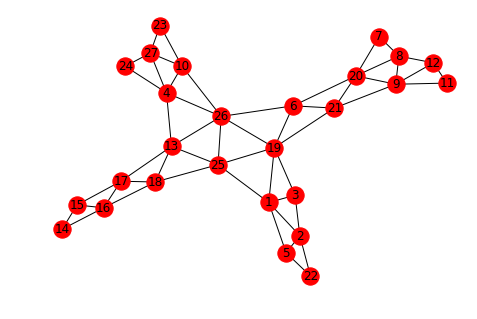

In [134]:
nx.draw(H, with_labels=True)
plt.savefig("Layout.jpg") # save as png
plt.show() # display

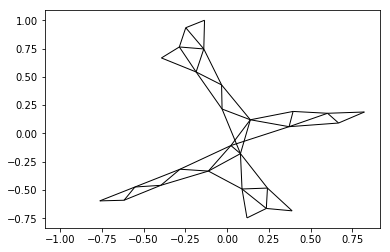

In [135]:
edges = nx.draw_networkx_edges(G, pos=nx.spring_layout(G))
plt.plot(-1,1)
plt.savefig("Layout_no_nodes.jpg") # save as png
plt.show() # display

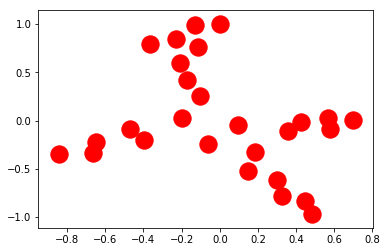

In [136]:
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G))
plt.savefig("Layout_no_edges.jpg") # save as png
plt.show() # display